In [5]:
import scipy as sp
Amp = 1
betap = -100
tau0 = 4.66
gamma = 1/tau0
beta = (betap*gamma**4)/(1+betap**2 * gamma **4)
omega_s = 3.24


In [8]:
def pulse_s(t):
    import scipy as sp
    Amp = 1
    betap = -100
    tau0 = 4.66
    gamma = 1/tau0
    beta = (betap*gamma**4)/(1+betap**2 * gamma **4)
    omega_s = 3.24
    Tau = tau0**2*(1+betap**2 * gamma**4)
    shape = Amp*sp.exp(-1*(t**2)/Tau)
    return shape*sp.cos(omega_s*t + 0.5 * beta*t**2)

In [31]:
pulse_s(-60)

-0.00025829001540979984

In [62]:
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
time = np.linspace(-60, 60, 1001)
result = pulse_s(time)

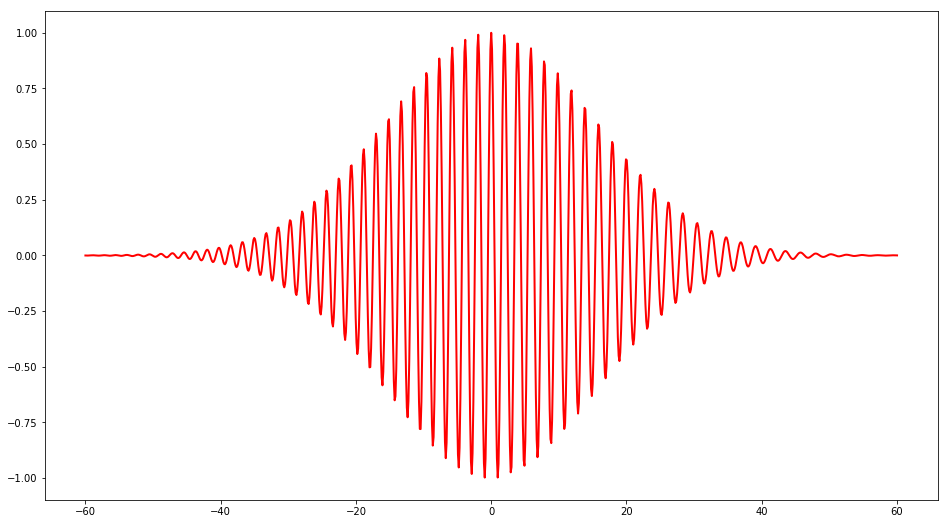

In [65]:
plt.figure(figsize = (16,9))
plt.plot(time,result, color = 'red', linewidth = 2);

In [73]:
import pandas as pd
power = 10
tot_num = 2**10
times = np.linspace(-60,60,tot_num)
output_time = []
output_frequency = []
output_signal = []
for time in times:
    cur_result = []
    freq = []
    tim = []
    def compul(tau):
        return pulse_s(time+0.5*tau) * np.conj(pulse_s(time-0.5*tau))
    taus = np.linspace(-60,60,tot_num)
    taustep = 120/(tot_num-1)
    comval = compul(taus)
    cur_result = np.fft.fft(comval)
    freq = np.linspace(0,(tot_num-1)/120, tot_num)
    tim = np.repeat(time,tot_num)
    output_time.append(list(tim))
    output_frequency.append(list(freq))
    output_signal.append(list(cur_result))
df = pd.DataFrame({"Time":output_time, "Frequency":output_frequency, "Signal":output_signal})
    

In [77]:
type(df.Signal)

pandas.core.series.Series